In [ ]:
%pip install mdptoolbox

In [38]:
import numpy as np
import mdptoolbox
import matplotlib.pyplot as plt

In [70]:
# Defining Parameters
p = 0.05 # Probability of trigging challenge mechanism
q = 1 # Probability of getting detected in challenge mechanism

R = 0.5 # Reward for completing the computation
C = 0.45 # Cost for completing the computation
C_1 = 0.45 # Cost for just decrypting the data
discount = 0.999 # Discount factor
K = 2000 # Cost of breaking the TEE
S = 100 # Cost of replacing the device 
U = 108
W = 1

temp_transition_model = np.zeros((3, 4, 4))

# For action 1 (a_A)
temp_transition_model[0, :, :] = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]])

# For action 2 (a_B1)
temp_transition_model[1, :, :] = np.array([[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1]])

# For action 3 (a_B2)
temp_transition_model[2, :, :] = np.array([[0, 0, 1 - p*q, p*q], [0, 0, 1 - p*q, p*q], [0, 0, 1 - p*q, p*q], [0, 0, 0, 1]])

# Defining the Reward Model. The first index is the action, second is the current state and third is the next state

reward_model = np.zeros((3, 4, 4))

# For action 1 (a_A)
reward_model[0, :, :] = np.array([[R - C, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [- S, 0, 0, 0]])

# For action 2 (a_B1)
reward_model[1, :, :] = np.array([[0, - K + R - C + W, 0, 0], [0, R - C + W, 0, 0], [0, R - C + W, 0, 0], [0, 0, 0, 0]])

# For action 3 (a_B2)
reward_model[2, :, :] = np.array([[0, 0, - K + R - C_1 + W + U, - K - C_1 + W], [0, 0, R - C_1 + W + U, - C_1 + W], [0, 0, R - C_1 + W + U, - C_1 + W], [0, 0, 0, 0]])

pi = mdptoolbox.mdp.PolicyIteration(temp_transition_model, reward_model, discount, max_iter=1000000)
pi.run()
print(pi.policy)

(0, 2, 2, 1)


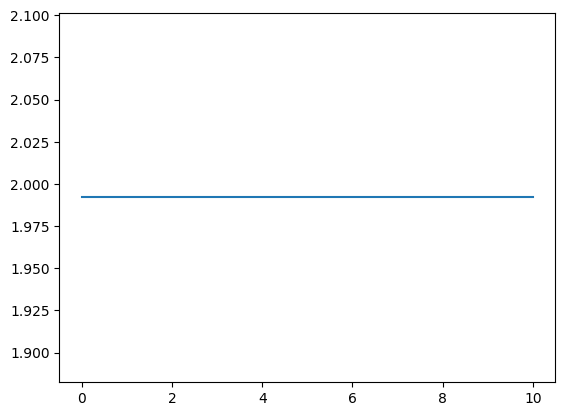

In [40]:
plt.plot(U_lim, W_lim)

In [17]:
vi = mdptoolbox.mdp.ValueIteration(temp_transition_model, reward_model, discount, max_iter=1000000)
vi.run()
print(vi.policy)
print(vi.V)

(1, 1, 1, 0)
(107.64852997216872, 2107.648529972169, 2107.648529972169, 4.5985299721684925)


In [37]:
pi = mdptoolbox.mdp.PolicyIteration(temp_transition_model, reward_model, discount, max_iter=1000000)
pi.run()
print(pi.policy)
print(pi.V)

(1, 1, 1, 0)
(149.99999999999758, 2149.9999999999977, 2149.9999999999977, 49.84999999999788)


In [88]:
q = mdptoolbox.mdp.QLearning(temp_transition_model, reward_model, discount, n_iter=1000000)
q.run()
print(q.policy)
print(q.V)

(0, 1, 1, 1)
(184.16491138986902, 299.9978446801327, 299.99655747893985, 0.0)
